Precisión del modelo: 0.7597402597402597


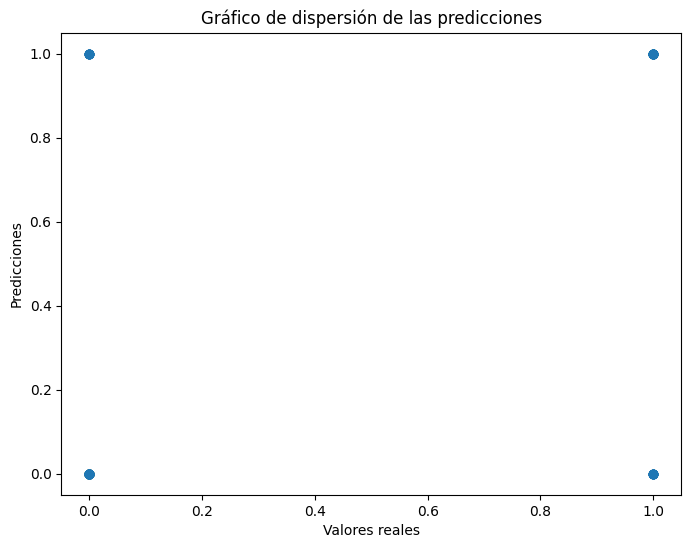


Primeras 5 filas del conjunto de datos:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Importa las bibliotecas necesarias.
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# URL del archivo diabetes.csv (recuerda reemplazar con la URL real)
url = "/content/sample_data/diabetes.csv"

# Descarga el archivo usando pandas
df = pd.read_csv(url)


diabetes_data = df.copy() # Use the dataframe loaded from the URL



# Define las variables de entrada (X) y la variable objetivo (y).
X = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Columnas de características
y = diabetes_data['Outcome']  # Columna de la variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para entrenamiento, 20% para prueba

# Escala las características utilizando StandardScaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crea un clasificador MLPClassifier con la función de activación 'identity'.
mlp = MLPClassifier(activation='identity', random_state=42)  # Usando parámetros por defecto

# Entrena el clasificador.
mlp.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba.
y_pred = mlp.predict(X_test)

# Imprime la precisión del modelo.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Crea un gráfico de dispersión de las predicciones.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de dispersión de las predicciones")
plt.show()

# Imprime los datos.
print("\nPrimeras 5 filas del conjunto de datos:")
diabetes_data.head()

Precisión del modelo: 0.7597402597402597

Matriz de Confusión:
[[81 18]
 [19 36]]


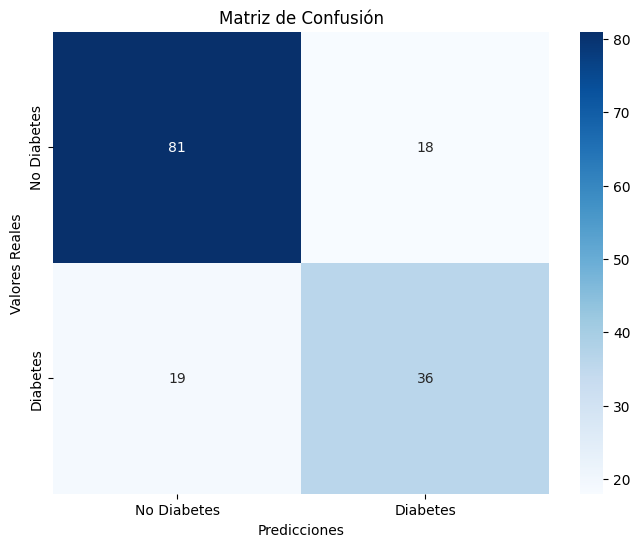


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Estadísticas descriptivas del dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000  

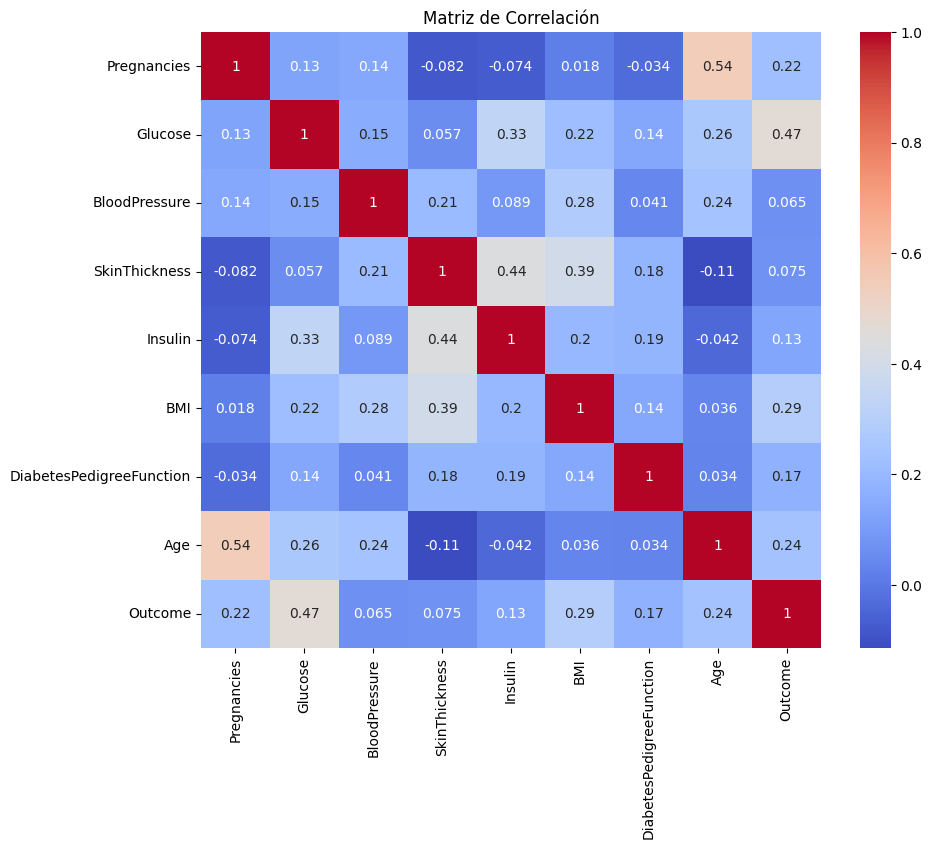

In [ ]:
# prompt: creame un informe del analisis obtenido

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# ... (código anterior) ...

# Imprime la precisión del modelo.
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(class_report)


# Análisis adicional: Estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(diabetes_data.describe())

# Análisis adicional: Correlación entre variables
correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# ... (código restante) ...